In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [38]:
dataset = "/home/flo/Documents/projet/k8s-security-module/05__data netflow/dataset/NetFlow v1 Datasets/NetFlow v1 Datasets/NF-UNSW-NB15.csv"
df = pd.read_csv(dataset)
print('Dimensions of the Test set:',df.shape)

Dimensions of the Test set: (1623118, 14)


In [39]:
df.dtypes

IPV4_SRC_ADDR                  object
L4_SRC_PORT                     int64
IPV4_DST_ADDR                  object
L4_DST_PORT                     int64
PROTOCOL                        int64
L7_PROTO                      float64
IN_BYTES                        int64
OUT_BYTES                       int64
IN_PKTS                         int64
OUT_PKTS                        int64
TCP_FLAGS                       int64
FLOW_DURATION_MILLISECONDS      int64
Label                           int64
Attack                         object
dtype: object

In [40]:
# All cols in the dataset
cols = ['IPV4_SRC_ADDR','L4_SRC_PORT','IPV4_DST_ADDR','L4_DST_PORT','PROTOCOL','L7_PROTO','IN_BYTES', 'OUT_BYTES','IN_PKTS','OUT_PKTS','TCP_FLAGS','FLOW_DURATION_MILLISECONDS','Label','Attack']

# Selected cols 
selected_cols = ['L4_SRC_PORT','L4_DST_PORT','PROTOCOL','L7_PROTO','IN_BYTES', 'OUT_BYTES','IN_PKTS','OUT_PKTS','FLOW_DURATION_MILLISECONDS']

Y_cols = ['Label']

In [41]:
X_data = df[selected_cols].copy() 
X_data = X_data[:70000]

Y_data = df[Y_cols].copy() 
Y_data = Y_data[:70000]


In [42]:
X = X_data[['L4_SRC_PORT','L4_DST_PORT','PROTOCOL','L7_PROTO','IN_BYTES', 'OUT_BYTES','IN_PKTS','OUT_PKTS','FLOW_DURATION_MILLISECONDS']]
y = Y_data[['Label']]
a = y

In [43]:
#Split IP adress
X[['IPV4_SRC_ADDR1', 'IPV4_SRC_ADDR2','IPV4_SRC_ADDR3', 'IPV4_SRC_ADDR4']] = df.IPV4_SRC_ADDR.str.split(".", expand = True)
X[['IPV4_DST_ADDR1', 'IPV4_DST_ADDR2','IPV4_DST_ADDR3', 'IPV4_DST_ADDR4']] = df.IPV4_DST_ADDR.str.split(".", expand = True)


In [44]:
# hash ip adress
hashencod = ['L4_SRC_PORT','L4_DST_PORT']
for h in hashencod:
    X[h] = pd.util.hash_pandas_object(X[h])%100

In [45]:
# Label encod
cols_labelencod = ['PROTOCOL','L7_PROTO','IN_PKTS','OUT_PKTS']

for x in cols_labelencod:
    labelencoder= LabelEncoder()
    X[x] = labelencoder.fit_transform(X[x])


In [46]:
# split cols
X = pd.get_dummies(X, columns=['L4_SRC_PORT','L4_DST_PORT','PROTOCOL','L7_PROTO','IN_PKTS','OUT_PKTS'])

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2,random_state=0)

X_train.shape,X_test.shape , y_train.shape ,y_test.shape

((56000, 1036), (14000, 1036), (56000, 1), (14000, 1))

In [48]:
X_train.dtypes

IN_BYTES                       int64
OUT_BYTES                      int64
FLOW_DURATION_MILLISECONDS     int64
IPV4_SRC_ADDR1                object
IPV4_SRC_ADDR2                object
                               ...  
OUT_PKTS_178                   uint8
OUT_PKTS_179                   uint8
OUT_PKTS_180                   uint8
OUT_PKTS_181                   uint8
OUT_PKTS_182                   uint8
Length: 1036, dtype: object

In [49]:
X_train=np.asarray(X_train).astype(np.int)
y_train=np.asarray(y_train).astype(np.int)

X_test=np.asarray(X_train).astype(np.int)
y_test=np.asarray(y_train).astype(np.int)


/tmp/ipykernel_836666/724880042.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_train=np.asarray(X_train).astype(np.int)
/tmp/ipykernel_836666/724880042.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in Num

In [57]:
classifier = Sequential()

In [58]:
#couche entrée
classifier.add(Dense(units=570, activation="relu", kernel_initializer="uniform", input_dim=1036))
#désactivation d'un neuronne à chaque test
classifier.add(Dropout(rate=0.1))
#couche cachée
classifier.add(Dense(units=570, activation="relu", kernel_initializer="uniform"))
#couche de sortie
classifier.add(Dense(units=1, activation="softmax", kernel_initializer="uniform"))
#compiler le réseau neuronne
classifier.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 570)               591090    
                                                                 
 dropout_7 (Dropout)         (None, 570)               0         
                                                                 
 dense_22 (Dense)            (None, 570)               325470    
                                                                 
 dense_23 (Dense)            (None, 1)                 571       
                                                                 
Total params: 917,131
Trainable params: 917,131
Non-trainable params: 0
_________________________________________________________________


In [59]:
classifier.fit(X_train, y_train, batch_size=10, epochs=100)


Epoch 1/100


2023-02-14 11:14:30.741424: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 464128000 exceeds 10% of free system memory.


5600/5600 [==============================] - 21s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0799
Epoch 2/100
5600/5600 [==============================] - 21s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0799
Epoch 3/100
5600/5600 [==============================] - 22s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0799
Epoch 4/100
5600/5600 [==============================] - 24s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0799
Epoch 5/100
5600/5600 [==============================] - 24s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0799
Epoch 6/100
5600/5600 [==============================] - 21s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0799
Epoch 7/100
5600/5600 [==============================] - 22s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0799
Epoch 8/100
5600/5600 [==============================] - 22s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0799
Epoch 9/100
5600/5600 [==============================] - 22s 4ms/step - loss: 0.0000e+00 - accuracy: 0.0799
Epoch 10/100
5600/5600 [================

: 

In [ ]:
score = classifier.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2023-02-14 11:10:33.712486: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 730880000 exceeds 10% of free system memory.


2500/2500 [==============================] - 5s 2ms/step - loss: 0.0677 - accuracy: 0.9651
Test loss: 0.06767819821834564
Test accuracy: 0.965149998664856


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

y_pred=classifier.predict(X_test, batch_size=128, verbose=0) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

: 

: 

<AxesSubplot: >

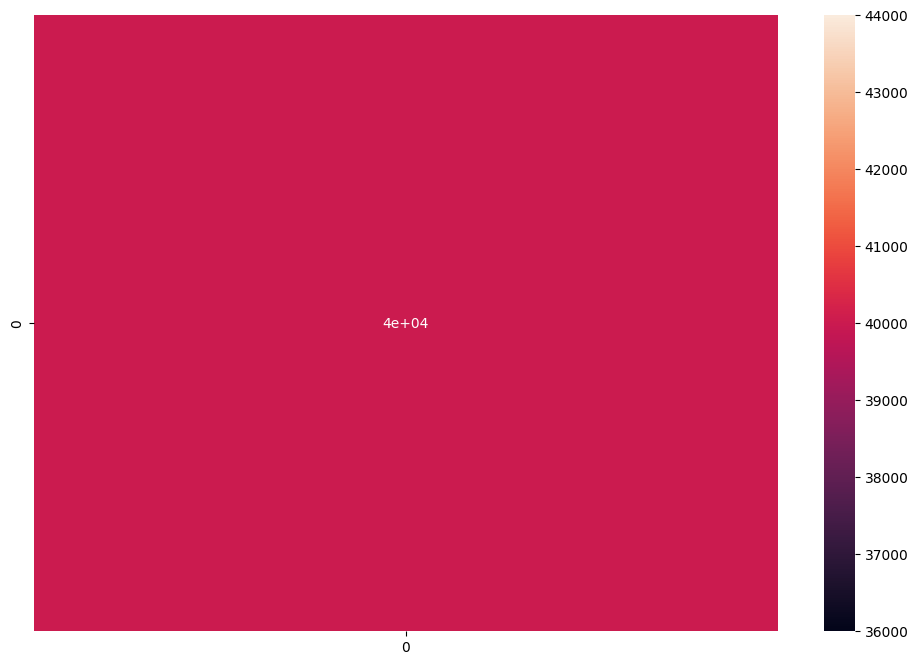

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     40000

    accuracy                           1.00     40000
   macro avg       1.00      1.00      1.00     40000
weighted avg       1.00      1.00      1.00     40000

